## GA-analysis1

Nb to analyze the optimization

In [11]:
using PyCall
using DataFrames

rootdir = "/home/stephane/Science/ALMA/ArrayConfig/GASS"
#rootdir = "/home/stephane/alma/ArrayConfig/GASS"

push!(LOAD_PATH,"$rootdir/master/src")
using GASS
using Printf

import PyPlot ; plt= PyPlot
import Random
import JLD

np= pyimport("numpy")

## directory
datadir = "$rootdir/master/data"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

In [12]:
## load the data
s = JLD.load("test_.jld")
println("## Data loaded...")

println(typeof(s["evol"][1]))
# s["evol"][5].subarr[5,2]

## Data loaded...
population


Any[5.74818, 3.81946, 4.32477, 3.82025, 5.42193, 4.49258, 3.86392, 5.66168, 4.8316, 5.46321, 5.67647, 6.19342, 3.17439, 3.09969, 4.0432, 5.92861, 5.5331, 5.05543, 5.42528, 5.42528, 3.18828, 3.18828, 3.18828, 2.74468, 2.74468, 4.07431, 2.23934, 3.32496, 2.91645, 3.5678, 3.5678, 4.18609, 4.18609, 4.18609, 4.18609, 2.91438, 2.91438, 2.91438, 3.97464, 3.97464, 3.97464, 3.14858, 2.6272, 3.57704, 3.57704, 3.57704, 3.47698, 3.47698, 3.47698, 3.47698, 4.07111, 3.54987, 3.54987, 3.54987, 3.67394, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.13027, 3.52677, 3.52677, 3.52677, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 3.3794, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.74616, 2.

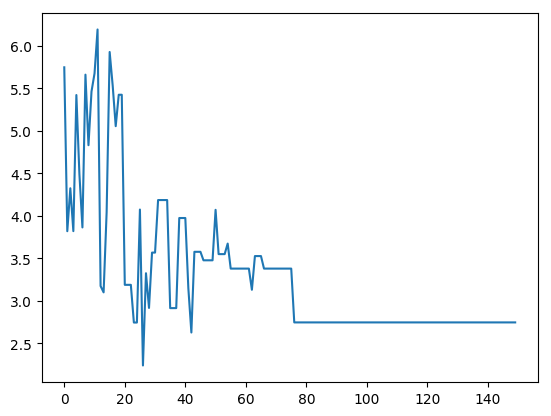

, 2.74616, 2.74616]


In [25]:
## Score evolution

timeseries= s["evol"][:]

score= []
ar= []
for pop in timeseries
    push!(score, pop.score[1])
    push!(ar, pop.param[1,1]["sidelobe"])
end

plt.plot(ar)
plt.show()

println(ar)


